In [1]:
import pandas as pd
import seaborn as sns

In [2]:
ps = sns.load_dataset('penguins')
ps.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
ps= ps.dropna()

In [4]:
ps.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
features= ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt.fit(ps[features], ps['species'])

DecisionTreeClassifier(max_depth=10)

In [18]:
predictions = dt.predict(ps[features])

In [19]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [20]:
calculate_accuracy(predictions, ps.species)

0.8528528528528528

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
ps_train, ps_test = train_test_split(ps, test_size=0.3, stratify=ps['species'], random_state=42)
print(ps_train.shape, ps_test.shape)

(233, 7) (100, 7)


In [23]:
features= ['bill_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt_classification.fit(ps_train[features], ps_train['species'])

DecisionTreeClassifier(max_depth=1)

In [24]:
predictionsOnTrainset = dt_classification.predict(ps_train[features])
predictionsOnTestset = dt_classification.predict(ps_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, ps_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, ps_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.759656652360515
Accuracy on test set 0.73


In [25]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

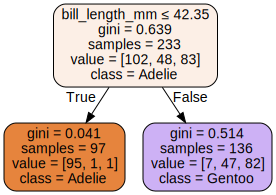

In [26]:
plot_tree_classification(dt_classification, features, ps.species.unique())